## In this CNN Project

1.   Importing Liabraies
2.   Load Data
3.   Show Image From Number
4.   Change Dimension / Feature Scaling
5.   Building First CNN
6.   Training the Model
7.   Testing & Evaluate Model
8.   Confusion Matrix
9.   Classification Report
10.  Saving The Model and Loading it
11.  Building a Complex CNN Model





# Buliding CNN - Convolution Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras

## Load Dataset

In [4]:
## Use only one code to import the data set

import tensorflow.keras as tk
mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
(x_train,y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [8]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
y_train[0]

9

In [12]:
class_labels= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel Boot"]

## Showing Image

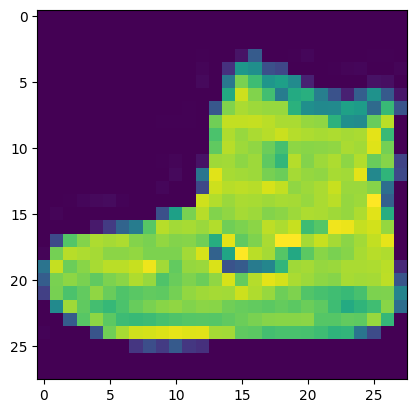

In [13]:
plt.imshow(x_train[0])

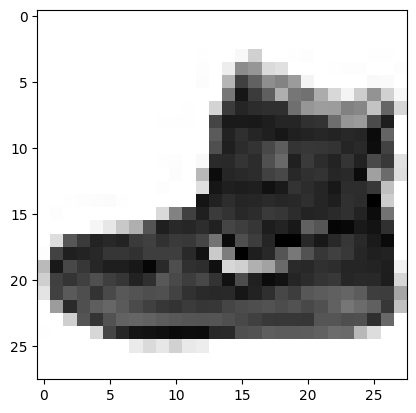

In [14]:
plt.imshow(x_train[0], cmap='Greys')

### To showing more images at a time

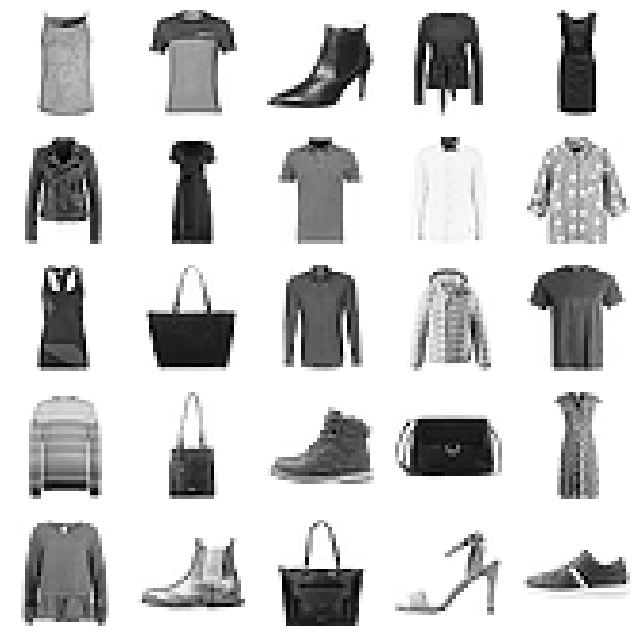

In [15]:
plt.figure(figsize=(8,8))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis('off')

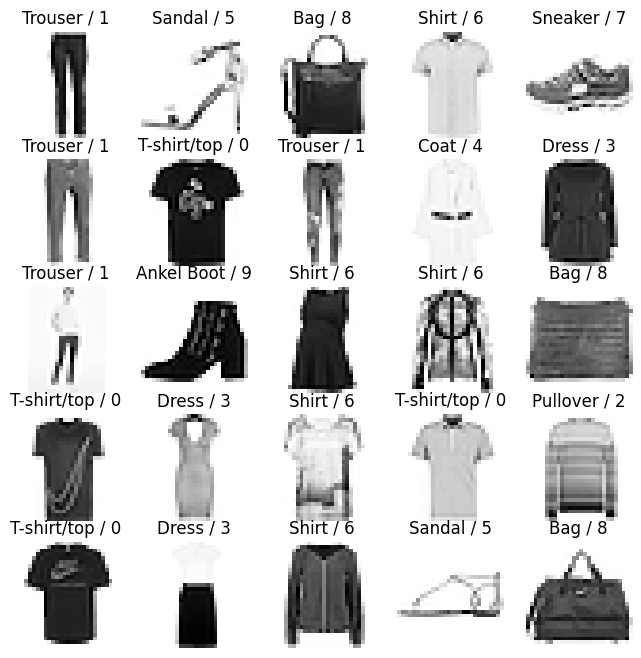

In [16]:
plt.figure(figsize=(8,8))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(f"{class_labels[y_train[i]]} / {y_train[i]}")

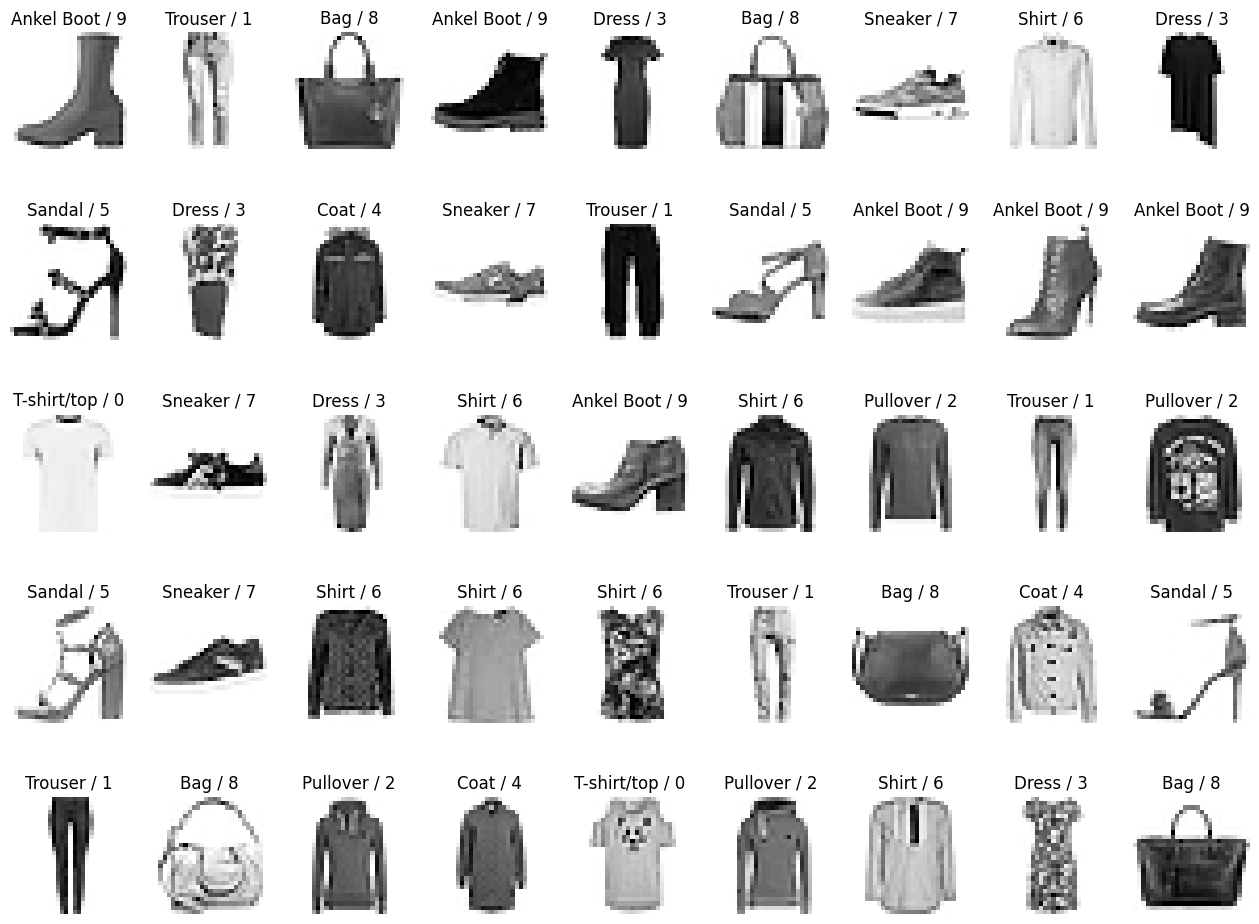

In [17]:
plt.figure(figsize=(16,12))

j=1
for i in np.random.randint(2000,10000,45):
  plt.subplot(5,9,j); j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(f"{class_labels[y_train[i]]} / {y_train[i]}")

Change Dimension

In [18]:
x_train.ndim  ## we have to change the dimension of image into 4-D

3

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train = np.expand_dims(x_train, -1)  # Changing the Dimension to 4
x_test = np.expand_dims(x_test,-1)

In [21]:
print("Dimension of X_train Data: ",x_train.ndim)
print("Dimenshion of X_test Data:",x_test.ndim)

Dimension of X_train Data:  4
Dimenshion of X_test Data: 4


In [22]:
x_train.shape

(60000, 28, 28, 1)

## Feature Scaling of the Data

 It is Necessary to do Feature Scaling to our Data 

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Split Dataset

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [27]:
x_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [28]:
x_val.shape,y_val.shape

((12000, 28, 28, 1), (12000,))

##Convolution Neural Network - Model Building

In [29]:
model = keras.models.Sequential([
                      keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                      keras.layers.Flatten(),    ## To convert many images into single row / in single vector
                      # To create neural network
                      keras.layers.Dense(units=120,activation='relu'),
                      keras.layers.Dense(units=10,activation='softmax') # output layer

])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 120)               649080    
                                                                 
 dense_1 (Dense)             (None, 10)                1210      
                                                                 
Total params: 650,610
Trainable params: 650,610
Non-trainable params: 0
__________________________________________________

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=["accuracy"])    ## loss='sparse_categorical_crossentropy' as this is a categorical feature

In [32]:
model.fit(x_train,y_train, epochs=10, batch_size =512, verbose=1, validation_data=(x_val,y_val))

Epoch 1/10
94/94 [==============================] - 27s 279ms/step - loss: 0.6308 - accuracy: 0.7828 - val_loss: 0.4338 - val_accuracy: 0.8468
Epoch 2/10
94/94 [==============================] - 24s 254ms/step - loss: 0.3758 - accuracy: 0.8690 - val_loss: 0.3555 - val_accuracy: 0.8767
Epoch 3/10
94/94 [==============================] - 27s 291ms/step - loss: 0.3238 - accuracy: 0.8863 - val_loss: 0.3274 - val_accuracy: 0.8842
Epoch 4/10
94/94 [==============================] - 25s 265ms/step - loss: 0.2944 - accuracy: 0.8957 - val_loss: 0.3120 - val_accuracy: 0.8892
Epoch 5/10
94/94 [==============================] - 24s 249ms/step - loss: 0.2775 - accuracy: 0.9005 - val_loss: 0.3041 - val_accuracy: 0.8927
Epoch 6/10
94/94 [==============================] - 25s 265ms/step - loss: 0.2565 - accuracy: 0.9088 - val_loss: 0.2857 - val_accuracy: 0.8978
Epoch 7/10
94/94 [==============================] - 25s 263ms/step - loss: 0.2451 - accuracy: 0.9120 - val_loss: 0.2810 - val_accuracy: 0.9026

In [34]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.2712 - accuracy: 0.9007
Test Loss: 0.2712081968784332
Test accuracy: 0.9006999731063843


In [33]:
score_1=model.evaluate(x_train,y_train)
print('Train Loss:', score_1[0])
print('Train accuracy:', score_1[1])

1500/1500 [==============================] - 10s 7ms/step - loss: 0.1951 - accuracy: 0.9296
Train Loss: 0.19513152539730072
Train accuracy: 0.9296249747276306


# Test the Model

In [35]:
model.predict(np.expand_dims(x_test[0], axis=0)).round(2)

1/1 [==============================] - 0s 97ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [36]:
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)).round(2))  ## Prediction Value

1/1 [==============================] - 0s 21ms/step


9

In [37]:
y_test[0]  ## Actually Value

9

In [38]:
y_pred=model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.14, 0.03, 0.01]], dtype=float32)

In [39]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2712 - accuracy: 0.9007


[0.2712081968784332, 0.9006999731063843]

## Visualize Output

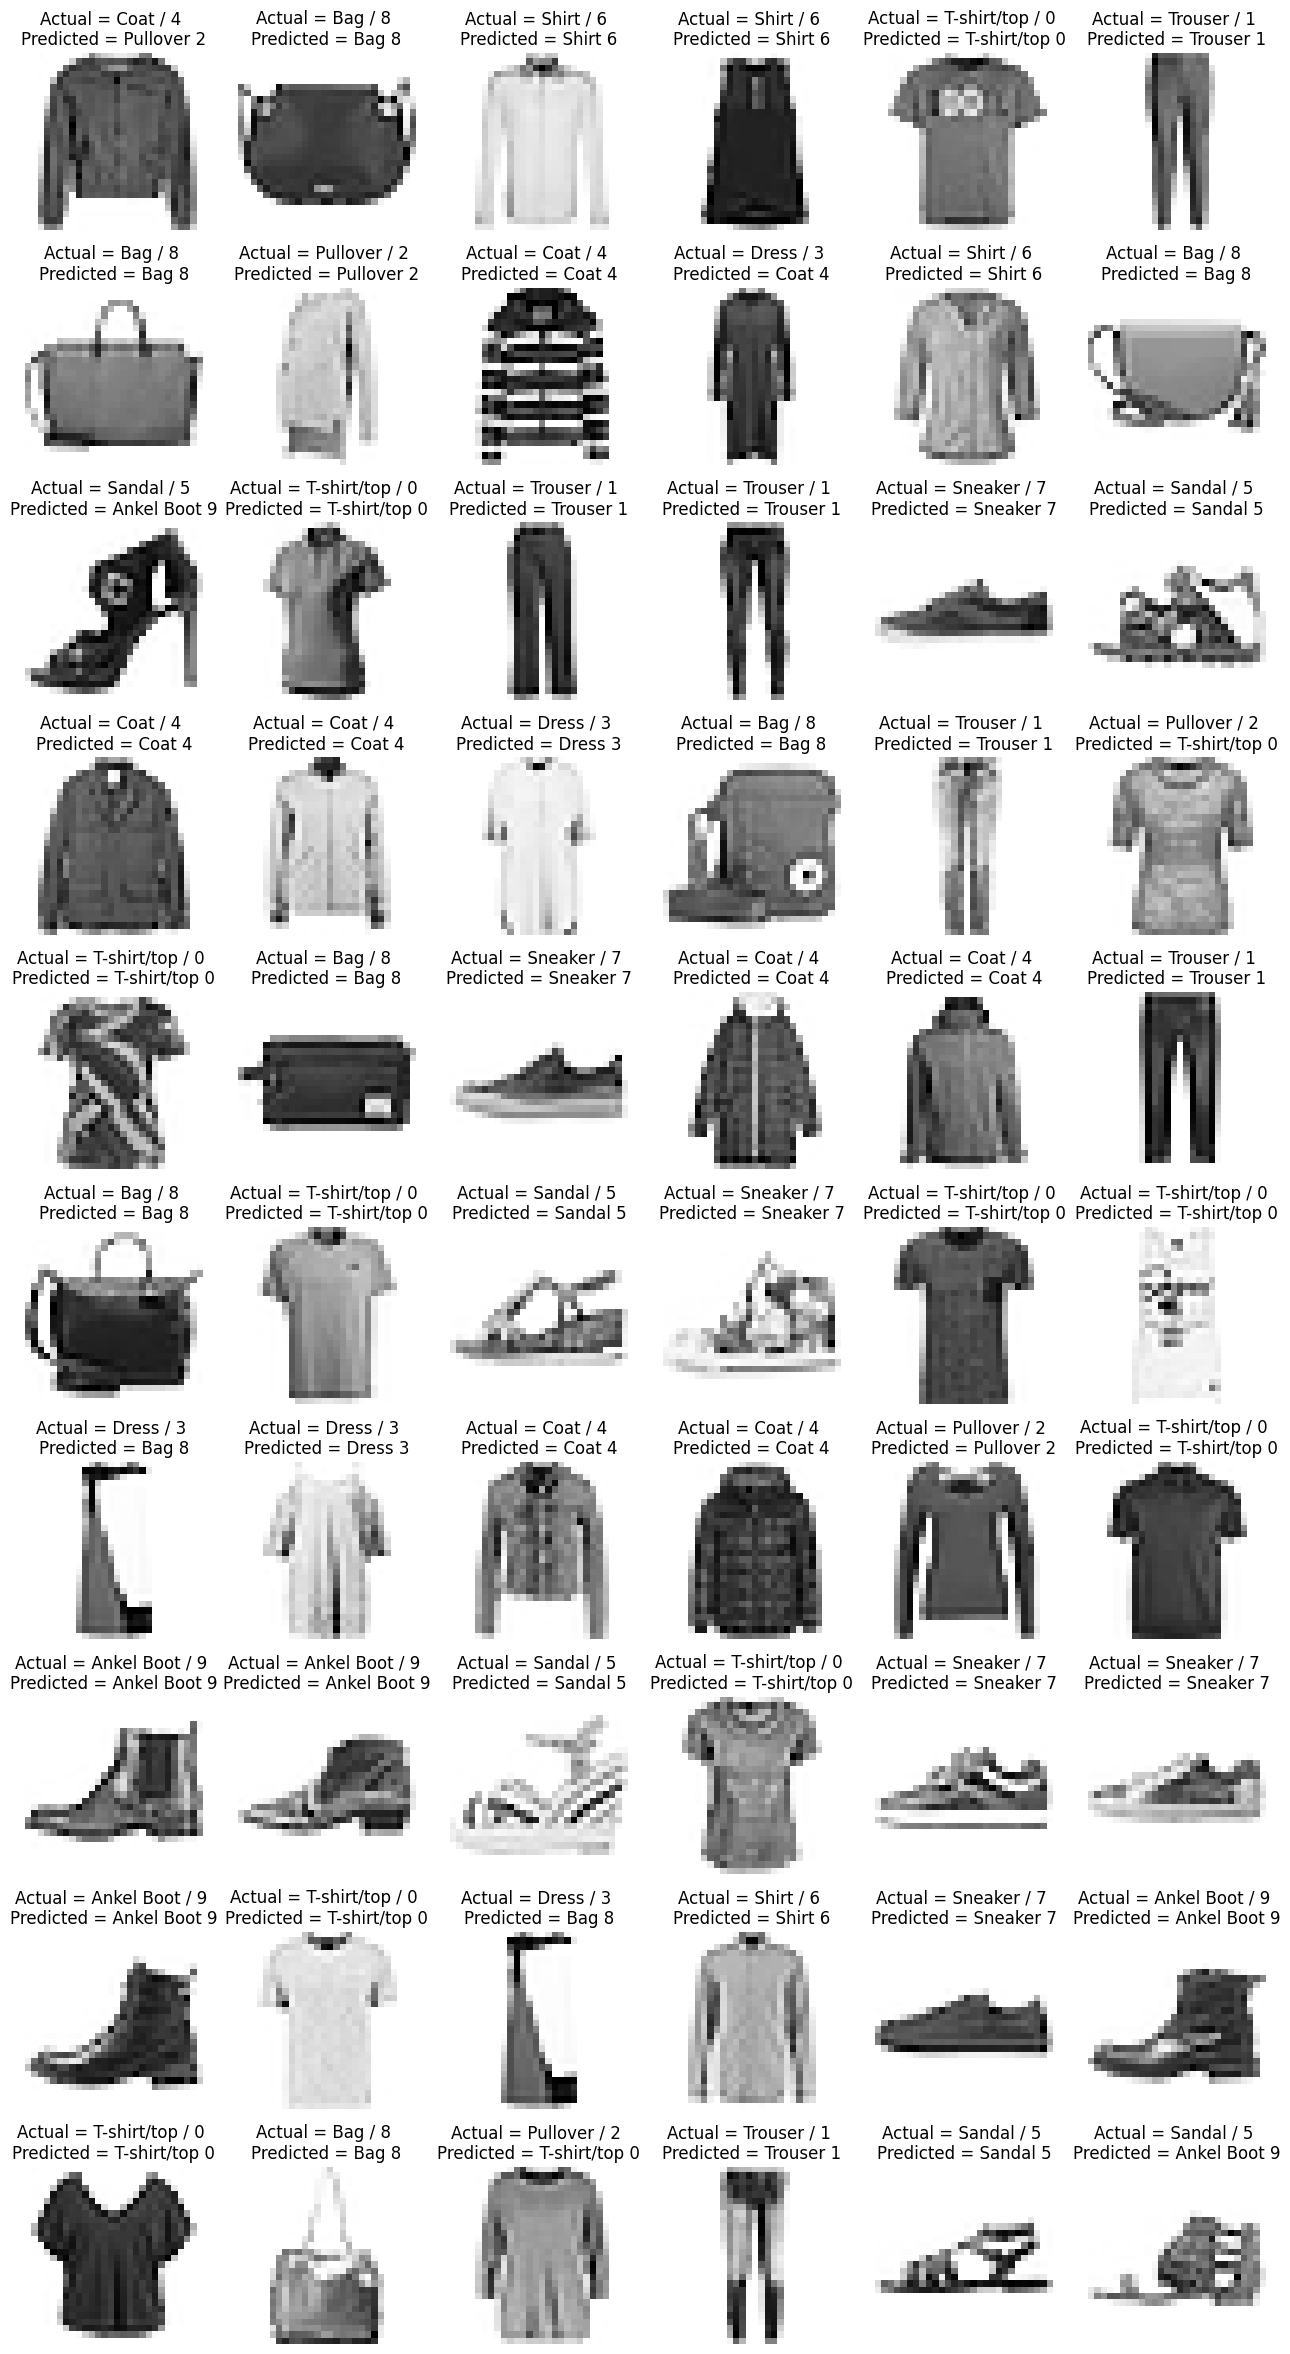

In [40]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys')
  plt.title("Actual = {} / {} \nPredicted = {} {}".format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis("off")

## Confusion Matrix -- As it is a classification problem

<Axes: >

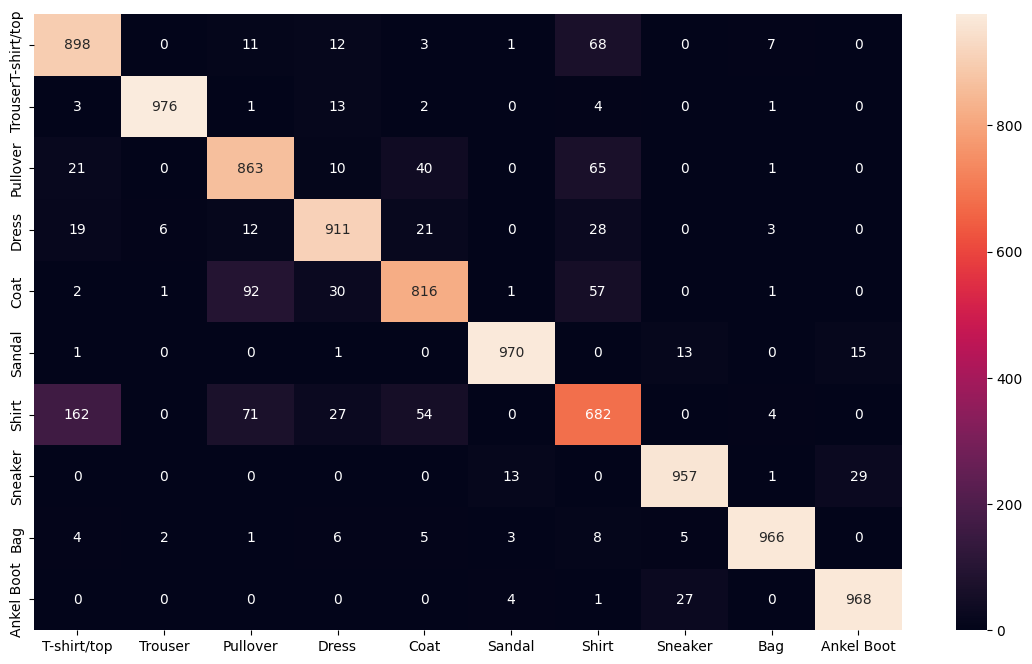

In [41]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14,8))
y_pred_label=[np.argmax(label) for label in y_pred] # Here we will get single label value not the neuron
cm = confusion_matrix(y_test,y_pred_label)

## Showing cm
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [42]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_label,target_names=class_labels)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.90      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.86      0.84      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.87      0.82      0.84      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.75      0.68      0.71      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankel Boot       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Model Save

In [43]:
model.save("fashion_classification_cnn_model.h5")  ## Saving the model in local

In [44]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''


Mounted at /content/drive


In [46]:
## Saving the model in Google Drive
path = '/content/drive/MyDrive/fashion_classification_cnn_model_2.h5'
model.save(path)

# To load the Model

In [47]:
model_loading = keras.models.load_model("fashion_classification_cnn_model.h5")

In [48]:
model_loading.predict(x_test)

313/313 [==============================] - 4s 11ms/step


array([[5.8422970e-06, 9.7623968e-07, 6.9200910e-06, ..., 1.2803062e-02,
        1.5418384e-04, 9.8457706e-01],
       [1.6348936e-04, 6.5886757e-10, 9.9820167e-01, ..., 1.4694732e-14,
        3.9576498e-09, 7.9590161e-11],
       [2.6018922e-06, 9.9999660e-01, 7.0523015e-08, ..., 1.8744470e-11,
        1.0563517e-08, 3.0652501e-11],
       ...,
       [5.5768259e-04, 1.9790710e-07, 2.5350237e-04, ..., 3.6587810e-06,
        9.9657518e-01, 3.6138229e-07],
       [5.3666490e-08, 9.9999577e-01, 6.0600101e-08, ..., 4.0224446e-10,
        1.0339156e-08, 4.6317972e-08],
       [1.2281603e-03, 5.0544415e-05, 9.3196705e-03, ..., 1.3881551e-01,
        3.3131383e-02, 9.9370098e-03]], dtype=float32)

In [49]:
model_loading.predict(x_test).round(2)

313/313 [==============================] - 4s 12ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.14, 0.03, 0.01]], dtype=float32)

In [50]:
model_loading.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 37ms/step


array([[5.8423088e-06, 9.7623786e-07, 6.9200978e-06, 4.3835930e-06,
        2.5686588e-06, 2.4366716e-03, 8.1912785e-06, 1.2803056e-02,
        1.5418431e-04, 9.8457712e-01]], dtype=float32)

In [51]:
## Getting the actual prediction of the image in term of number
np.argmax(model_loading.predict(np.expand_dims(x_test[0], axis=0)))

1/1 [==============================] - 0s 21ms/step


9

# Building The CNN Complex Model

In [58]:
## Building CNN Model in a complex way
cnn_model = keras.models.Sequential([
                              keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu',input_shape=[28,28,1]),
                              keras.layers.MaxPool2D(pool_size=(2,2)),
                              keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                              keras.layers.MaxPooling2D(pool_size=(2,2)),
                              keras.layers.Flatten(),
                              keras.layers.Dense(units=128, activation='relu'), # First Input Layer
                              keras.layers.Dropout(0.25),                       # it is for regulazite the model to save from overfitting
                              keras.layers.Dense(units=256, activation='relu'), # Second Input Layer
                              keras.layers.Dropout(0.25),
                              keras.layers.Dense(units=128,activation='relu'),  # Third Input Layer
                              keras.layers.Dense(units=10,activation='softmax') # Output Layer
])

In [59]:
## Compiling The Model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [61]:
## Traing the model  
# Note : we shoul take more epochs but it will take very much time and i have low grade system so i used on 5 epochs
cnn_model.fit(x_train,y_train, epochs=5, batch_size=512, verbose=1, validation_data= (x_val,y_val) )

Epoch 1/5
94/94 [==============================] - 33s 350ms/step - loss: 0.5826 - accuracy: 0.7786 - val_loss: 0.4796 - val_accuracy: 0.8247
Epoch 2/5
94/94 [==============================] - 33s 347ms/step - loss: 0.4771 - accuracy: 0.8231 - val_loss: 0.4164 - val_accuracy: 0.8472
Epoch 3/5
94/94 [==============================] - 32s 346ms/step - loss: 0.4161 - accuracy: 0.8495 - val_loss: 0.3793 - val_accuracy: 0.8593
Epoch 4/5
94/94 [==============================] - 30s 324ms/step - loss: 0.3760 - accuracy: 0.8643 - val_loss: 0.3673 - val_accuracy: 0.8635
Epoch 5/5
94/94 [==============================] - 33s 353ms/step - loss: 0.3469 - accuracy: 0.8738 - val_loss: 0.3269 - val_accuracy: 0.8795


In [62]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.3382 - accuracy: 0.8766


[0.3381592333316803, 0.8766000270843506]

In [64]:
accuracy_1=cnn_model.evaluate(x_train,y_train)
print('Train Loss of cnn_model:', accuracy_1[0])
print('Train accuracy cnn_model:', accuracy_1[1])

1500/1500 [==============================] - 16s 11ms/step - loss: 0.2958 - accuracy: 0.8918
Train Loss of cnn_model: 0.29581955075263977
Train accuracy cnn_model: 0.8918333053588867


In [66]:
accuracy_2=cnn_model.evaluate(x_test,y_test)
print('Test Loss of cnn_model:', accuracy_2[0])
print('Test accuracy cnn_model:', accuracy_2[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.3382 - accuracy: 0.8766
Test Loss of cnn_model: 0.3381592333316803
Test accuracy cnn_model: 0.8766000270843506
